In [1]:
import pydotplus
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
import collections
  

In [2]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]


In [3]:


test_idx = [0,50,100]

# training data 
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis = 0)

# testing data 
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]


#### Train Classifier
The next step is to train the classifier (decision tree) with the training data. 
Training is always necesssary for supervised learning algorithm.

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)

print(test_target)
print(clf.predict(test_data))


[0 1 2]
[0 1 2]


#### Decision Tree Visualization
We then visualize the tree this complete code:

In [10]:
# Visualzie data


from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus


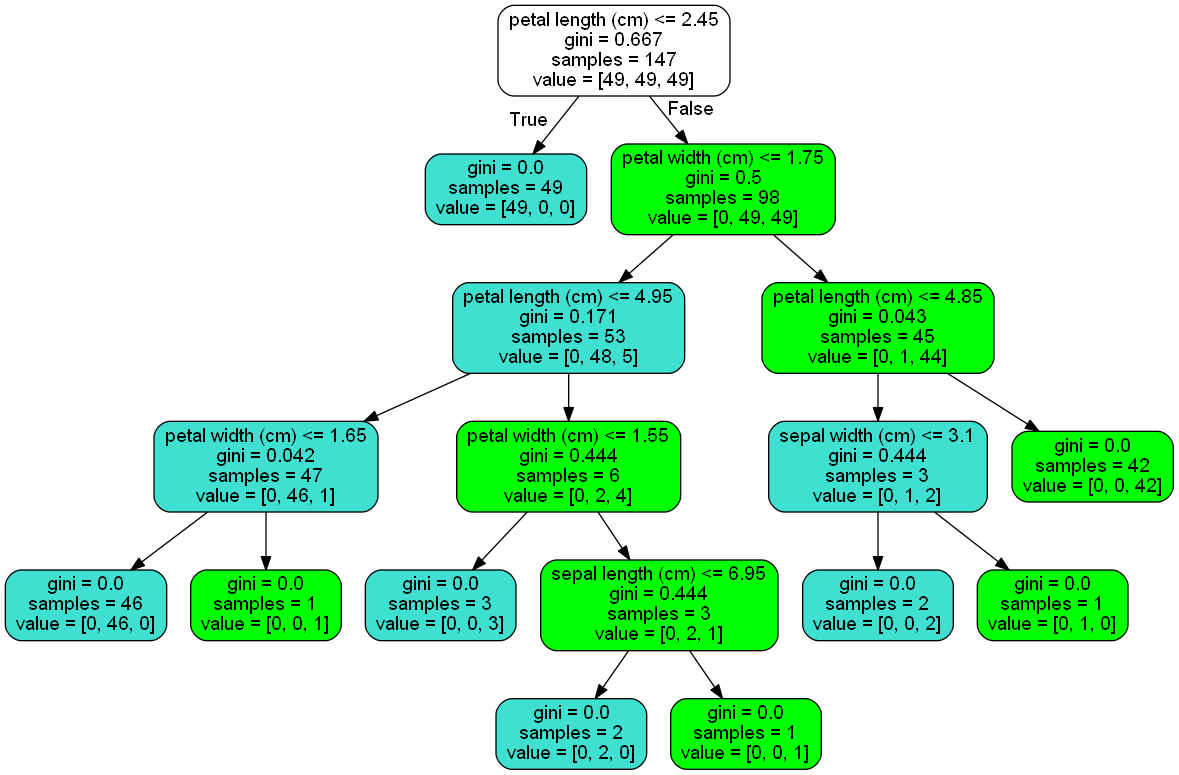

In [14]:
dot_data = tree.export_graphviz(clf, feature_names = iris.feature_names,
                               out_file = None,
                               filled = True,
                               rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'green')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
Image(graph.create_png())